In [1]:
import imblearn
print(imblearn.__version__)
from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from numpy import where

0.8.0


In [2]:
X, y = make_classification(n_samples = 10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [3]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


dict_items([(0, 9900), (1, 100)])
1 100
[ 207  649  843 1017 1098 1155 1306 1308 1325 1374 1561 1583 1632 1720
 1811 1813 1890 1962 1963 2034 2061 2093 2115 2138 2312 2362 2475 2703
 2713 2961 3060 3170 3196 3309 3407 3562 3598 3600 3708 3812 3911 4047
 4122 4130 4189 4571 4587 4650 5017 5116 5244 5297 5357 5444 5451 5612
 5783 5912 5917 5988 6021 6111 6120 6253 6387 6502 6591 6695 6829 7011
 7168 7251 7329 7336 7356 7360 7392 7468 7584 7668 7984 8168 8322 8378
 8405 8429 8499 8554 8668 8720 8859 9005 9048 9092 9093 9160 9498 9613
 9803 9909]
[-1.17981619 -0.78165747  0.67273271 -1.08590144 -0.81193751 -0.70808671
 -0.11747861 -2.24265191 -1.60083851 -1.07715422 -1.19141549 -2.49361812
 -0.26845744 -0.02272312 -2.34351502 -2.01649581 -2.43902645 -2.11053309
  0.72849008 -0.83208598  0.69455428 -1.62779317  0.96973843  0.43835941
  0.46157718  0.35435843  0.73181856 -1.24801561 -2.27890186  0.68053742
 -0.8592469  -1.40930341 -2.75941944 -1.75033582  1.32109201 -2.08628499
 -0.4175973  

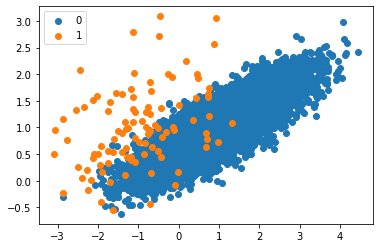

In [8]:
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
print(counter.items())
print(label, _)
print(where(y == label)[0])
print(X[row_ix, 0])
print(X[row_ix, 1])
plt.legend()
plt.show()

In [5]:
print(X[19799, 0])
print(X[19799, 1])

IndexError: index 19799 is out of bounds for axis 0 with size 10000

In [9]:
print(X[207, 0])
print(y[207])

-1.1798161937475613
1


In [ ]:
lista = []
for label, _ in counter.items():
    lista.append(_)
print(lista)

In [10]:
oversample = SMOTE()

In [11]:
X, y = oversample.fit_resample(X, y)

In [12]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 9900})


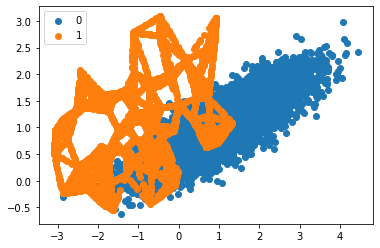

In [13]:
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


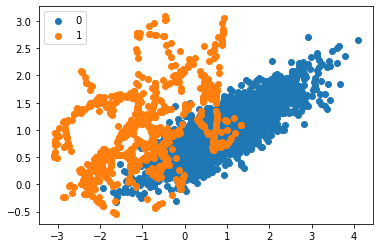

In [6]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [1]:
import pandas as pd
df = pd.read_csv("Default_fin.csv", index_col = "Index")

In [2]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [3]:
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy = 0.1)
under = RandomUnderSampler(sampling_strategy = 0.5)

In [4]:
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

In [5]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.789


In [7]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
counter = Counter(y)
print(counter)

Counter({0: 9667, 1: 333})


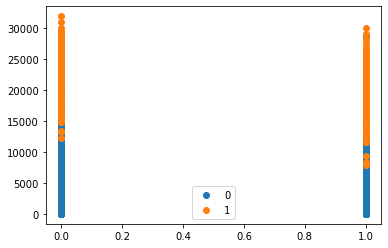

In [10]:
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [22]:
#################################

Counter({0: 9667, 1: 333})
Counter({0: 9667, 1: 9667})


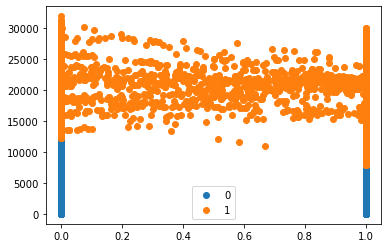

In [11]:
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [13]:
os_X = pd.DataFrame(data = X)
os_y = pd.DataFrame(data = y)

In [19]:
resultado_oversampling_os_X = os_X.to_excel(excel_writer='resultado_oversampling_os_X.xlsx') 


In [20]:
resultado_oversampling_os_y = os_y.to_excel(excel_writer='resultado_oversampling_os_y.xlsx') 


# REVISANDO EL TEMA DE MULTICOLINEALIDAD

In [1]:
import pandas as pd
df = pd.read_csv("Default_fin.csv", index_col = "Index")

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df.columns

Index(['Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

In [4]:
vif_Data = pd.DataFrame()
vif_Data["Feature"] = df.columns

In [5]:
vif_Data['VIF'] = [variance_inflation_factor(df.values, i)
                      for i in range(len(df.columns))]

In [13]:
print(vif_Data)

         Feature        VIF
0       Employed   7.990309
1   Bank Balance   2.961159
2  Annual Salary  11.126084
3     Defaulted?   1.152220


In [ ]:
###################################################################################

In [6]:
import pandas as pd
dframe = pd.read_excel("Default_fin.xlsx", index_col = "Index")
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
dframe.columns

Index(['Employed', ' Bank Balance ', 'AS', 'Defaulted?'], dtype='object')

In [8]:
vif_Dataa = pd.DataFrame()
vif_Dataa["Feature"] = dframe.columns

In [9]:
vif_Dataa['VIF'] = [variance_inflation_factor(dframe.values, i)
                      for i in range(len(dframe.columns))]

In [13]:
print(vif_Dataa['VIF'])

0    2.147575
1    2.931854
2    2.806271
3    1.153074
Name: VIF, dtype: float64
